### Code to generate trajectories (Beta!, out of order as well)
#### 2021 01 20 CJH

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from importlib import reload

import telemetry_plot_utils as tpu 

---
#### making trajectories by hand - neds a lot of points on the corners

In [7]:
pwd

'C:\\Cory\\CJH Shared\\Python\\FRC\\FRC_training\\notebooks\\telemetery_plotting'

In [8]:
pathdir = r'C:\Cory\CJH Shared\Python\FRC\2022\robot\pathweaver\paths'
path_weaver_files = data_files = glob.glob(pathdir + '/*')
path_weaver_files

['C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\2_circle',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\2_meters',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\barrel_pw1',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\bounce_pw4',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\calibrate',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\calibrate_rev',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\hub_to_ball',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\PathWeaver',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\slalom_pw4_smooth',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\terminal_to_shot',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\two_ball_traversal']

In [42]:
from pathlib import Path
parent_dir = Path(r'C:\Cory\CJH Shared\Python\FRC\2022\robot')
path_dir = parent_dir / 'pathweaver/paths'
glob.glob(str(path_dir) + '\*')

['C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\2_circle',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\2_meters',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\barrel_pw1',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\bounce_pw4',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\calibrate',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\calibrate_rev',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\hub_to_ball',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\PathWeaver',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\slalom_pw4_smooth',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\terminal_to_shot',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\two_ball_traversal']

In [56]:
reload(tpu)
print(f'tpu.robot_dir is {tpu.robot_dir}')
tpu.set_path(parent_dir)

tpu.robot_dir is None
Robot dir set to C:\Cory\CJH Shared\Python\FRC\2022\robot


In [57]:
df_points = tpu.get_points_df(name='slalom_pw4_smooth')
df_points.head()

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.100000,0.693851,3.118779,0.110262,True,False,NaN
1,3.255297,2.464733,2.023144,0.469742,True,False,NaN
2,6.663729,2.139729,0.656770,-1.843370,True,False,NaN
3,7.830422,0.735519,1.476942,0.074113,True,False,NaN
4,7.620639,2.348860,-2.129211,-0.742971,True,False,NaN


In [58]:
# generate translation waypoints 
def waypoints_from_path(file):
    out = ""
    df_points = tpu.get_points_df(name=file)
    for ix, i in enumerate(zip(df_points['X'],df_slalolm['Y'])):
        out = out+ f"geo.Translation2d({i[0]:2.2f}, {i[1]:2.2f}), "
        if (ix-2) % 3 == 0:
            out= out+ '\n'
    print(out[:-2])

In [60]:
# copy x,y,angle data from the smartdash and make a list of them
x_offset, y_offset = 1.2, 0.9
# points used to generate trajectory
plist = [(1.520012,0.910000,0.000000), (2.447216,1.374044,59.807731), (3.359672,2.612377,39.789710), 
         (5.942630,2.809398,0.000000), (6.944320,1.960623,-69.456607), 
         (7.255449,1.207945,0.000000), (8.605512,1.105526,36.654595), 
         (8.717240,2.399724,131.803625), (8.173342,2.724106,178.791021), 
         (7.302003,2.381102,-117.243430), (7.065360,1.737164,-116.747003),
         (6.497403,1.066788,-146.158568), (4.970436,0.852641,178.906396), 
         (3.005862,1.234382,136.592009), (2.316865,2.258568,131.932310),
         (1.423031,2.593755,-179.951353), (1.054474,2.660425,179.761362)]
df_slalolm = pd.DataFrame(plist, columns=['X', 'Y', 'THETA'])
df_slalolm['X_NEW'] = df_slalolm['X'] - x_offset
df_slalolm['Y_NEW'] = df_slalolm['Y'] - y_offset
df_slalolm['RAD'] = df_slalolm['THETA']*3.1415/180
df_slalolm.round(2).head()

,X,Y,THETA,X_NEW,Y_NEW,RAD
0,1.52,0.91,0.00,0.32,0.01,0.00
1,2.45,1.37,59.81,1.25,0.47,1.04
2,3.36,2.61,39.79,2.16,1.71,0.69
3,5.94,2.81,0.00,4.74,1.91,0.00
4,6.94,1.96,-69.46,5.74,1.06,-1.21


In [61]:
file = 'slalom_pw4_smooth'
waypoints_from_path(file)

geo.Translation2d(1.10, 0.91), geo.Translation2d(3.26, 1.37), geo.Translation2d(6.66, 2.61), 
geo.Translation2d(7.83, 2.81), geo.Translation2d(7.62, 1.96), geo.Translation2d(6.59, 1.21), 
geo.Translation2d(3.07, 1.11), geo.Translation2d(1.40, 2.40)


In [62]:
# generate translation waypoints 
x_offset, y_offset = 1.2, 0.9
out = ""
for ix, i in enumerate(zip(df_slalolm['X_NEW'],df_slalolm['Y_NEW'])):
    out = out+ f"geo.Translation2d({i[0]:2.2f}, {i[1]:2.2f}), "
    if (ix-2) % 3 == 0:
        out= out+ '\n'
print(out)

geo.Translation2d(0.32, 0.01), geo.Translation2d(1.25, 0.47), geo.Translation2d(2.16, 1.71), 
geo.Translation2d(4.74, 1.91), geo.Translation2d(5.74, 1.06), geo.Translation2d(6.06, 0.31), 
geo.Translation2d(7.41, 0.21), geo.Translation2d(7.52, 1.50), geo.Translation2d(6.97, 1.82), 
geo.Translation2d(6.10, 1.48), geo.Translation2d(5.87, 0.84), geo.Translation2d(5.30, 0.17), 
geo.Translation2d(3.77, -0.05), geo.Translation2d(1.81, 0.33), geo.Translation2d(1.12, 1.36), 
geo.Translation2d(0.22, 1.69), geo.Translation2d(-0.15, 1.76), 


In [63]:
# generate poses
# simple loop test - see that it works and help to tune constants
plist = [(1.287243,0.919311,0.000000), (7.367178,1.058972,0.000000), (8.819659,1.766591,91.521775), 
         (7.255449,2.651115,179.934763), (1.408283,2.604561,179.934763) ]
df_slalolm = pd.DataFrame(plist, columns=['X', 'Y', 'THETA'])
df_slalolm['X_NEW'] = df_slalolm['X'] - x_offset
df_slalolm['Y_NEW'] = df_slalolm['Y'] - y_offset
df_slalolm['RAD'] = df_slalolm['THETA']*3.1415/180
df_slalolm.round(2)

,X,Y,THETA,X_NEW,Y_NEW,RAD
0,1.29,0.92,0.00,0.09,0.02,0.00
1,7.37,1.06,0.00,6.17,0.16,0.00
2,8.82,1.77,91.52,7.62,0.87,1.60
3,7.26,2.65,179.93,6.06,1.75,3.14
4,1.41,2.60,179.93,0.21,1.70,3.14


In [64]:
# generate pose waypoints
out = ""
for ix, i in enumerate(zip(df_slalolm['X_NEW'],df_slalolm['Y_NEW'],df_slalolm['RAD'])):
    out = out+ f"geo.Pose2d({i[0]:2.2f}, {i[1]:2.2f}, geo.Rotation2d({i[2]:2.2f})), "
    if (ix) % 2 == 0:
        out= out+ '\n'
print(out)

geo.Pose2d(0.09, 0.02, geo.Rotation2d(0.00)), 
geo.Pose2d(6.17, 0.16, geo.Rotation2d(0.00)), geo.Pose2d(7.62, 0.87, geo.Rotation2d(1.60)), 
geo.Pose2d(6.06, 1.75, geo.Rotation2d(3.14)), geo.Pose2d(0.21, 1.70, geo.Rotation2d(3.14)), 



---
#### Measure the feed forward parameters to characterize the drivetrain

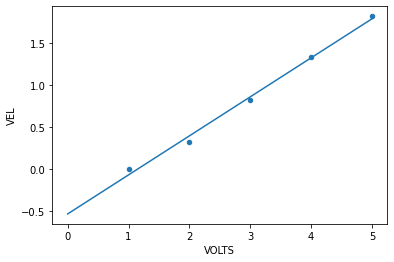

In [65]:
# feed forward - run at a fixed voltage and measure the velocity, generate the intercept and slope for the SimpleMotorFeedForward object
ff_x = [1, 2,    3,    4,    5]
ff_y = [0, 0.33, 0.83, 1.33,  1.82]

df_pid = pd.DataFrame({'VOLTS':ff_x, 'VEL':ff_y})
ax = df_pid.plot('VOLTS', 'VEL', kind='scatter')

par = np.polyfit(ff_x, ff_y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = np.linspace(0,5,51)
yl = slope*xl + intercept

plt.plot(xl,yl)

In [66]:
ks = -intercept/slope
kv = 1/slope
ks, kv

(1.142241379310347, 2.1551724137931028)

---
#### Fitting some distance data - not necessary now that encoders are fixed

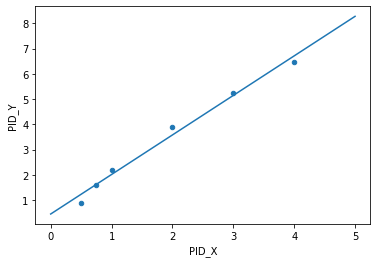

In [67]:
# this used 
pid_x = np.array([0.5,  0.75,  1,    2,    3,    4  ])
pid_y = np.array([0.88, 1.62,  2.20, 3.89, 5.25, 6.48])

df_pid = pd.DataFrame({'PID_X':pid_x, 'PID_Y':pid_y})
ax = df_pid.plot('PID_X', 'PID_Y', kind='scatter')

par = np.polyfit(pid_x, pid_y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = np.linspace(0,5,51)
yl = slope*xl + intercept

plt.plot(xl,yl)

In [68]:
example = [{'points': 50, 'time': '5:00', 'year': 2010}, 
{'points': 25, 'time': '6:00', 'month': "february"}, 
{'points':90, 'time': '9:00', 'month': 'january'}, 
{'points_h1':20, 'month': 'june'}]
pd.DataFrame(example)

,points,time,year,month,points_h1
0,50.0,5:00,2010.0,NaN,NaN
1,25.0,6:00,NaN,february,NaN
2,90.0,9:00,NaN,january,NaN
3,NaN,NaN,NaN,june,20.0


In [83]:
import glob
from pathlib import Path
pathdir = Path(r'C:\Cory\CJH Shared\Python\FRC\2022\robot\pathweaver\paths')
def get_pathweaver_generators():
    path_files = glob.glob(str(path_dir) + '\*', recursive=True)
    path_names = [Path(file).name for file in path_files]
    return path_names
get_pathweaver_generators()

['2_circle',
 '2_meters',
 'barrel_pw1',
 'bounce_pw4',
 'calibrate',
 'calibrate_rev',
 'hub_to_ball',
 'PathWeaver',
 'slalom_pw4_smooth',
 'terminal_to_shot',
 'two_ball_traversal']

In [91]:
def get_pathweaver_json():
    pathdir = Path(r'C:\Cory\CJH Shared\Python\FRC\2022\robot\pathweaver\output')
    path_files = glob.glob(str(pathdir) + '/*.json', recursive=True)
    path_names = [Path(file).name for file in path_files]
    return path_files
js = get_pathweaver_json()
js

['C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\output\\2_circle.wpilib.json',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\output\\2_meters.wpilib.json',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\output\\barrel_pw1.wpilib.json',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\output\\bounce_pw4.wpilib.json',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\output\\calibrate.wpilib.json',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\output\\calibrate_rev.wpilib.json',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\output\\hub_to_ball.wpilib.json',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\output\\slalom_pw4_smooth.wpilib.json',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\output\\terminal_to_shot.wpilib.json',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\output\\two_ball_traversal.wpilib.json']

#### read the pathweaver trajectory generation on the fwd and rev of calibrate
* conclusion: reverse on pathwever 
  * has the same x and y
  * reverses the velocity, acceleration and curvature 
  * flips the direction the robot is facing

In [92]:
df = pd.read_json(js[6])
df['ROT'] = [df.at[i,'pose']['rotation']['radians'] for i, row in df.iterrows()]
df

,acceleration,curvature,pose,time,velocity,ROT
0,3.000000,0.000000e+00,"{'rotation': {'radians': -1.930231007592048}, ...",0.000000,0.000000,-1.930231
1,3.000000,4.512416e-01,"{'rotation': {'radians': -1.8984809140703942},...",0.283878,0.851634,-1.898481
2,3.000000,5.186367e-01,"{'rotation': {'radians': -1.866863886171529}, ...",0.351203,1.053608,-1.866864
3,3.000000,5.112281e-01,"{'rotation': {'radians': -1.8314916157795462},...",0.410760,1.232280,-1.831492
4,3.000000,4.633064e-01,"{'rotation': {'radians': -1.795893452677615}, ...",0.466090,1.398271,-1.795893
5,3.000000,4.004186e-01,"{'rotation': {'radians': -1.762205176386294}, ...",0.518872,1.556616,-1.762205
6,3.000000,3.374001e-01,"{'rotation': {'radians': -1.731484742920891}, ...",0.569956,1.709868,-1.731485
7,3.000000,2.810926e-01,"{'rotation': {'radians': -1.70408612418699}, '...",0.619759,1.859277,-1.704086
8,3.000000,2.336360e-01,"{'rotation': {'radians': -1.679961176011806}, ...",0.668451,2.005354,-1.679961
9,3.000000,1.948576e-01,"{'rotation': {'radians': -1.658862900679301}, ...",0.716054,2.148161,-1.658863


In [93]:
df = pd.read_json(js[7])
df['ROT'] = [df.at[i,'pose']['rotation']['radians'] for i, row in df.iterrows()]
df

,acceleration,curvature,pose,time,velocity,ROT
0,3.0,0.000000e+00,{'rotation': {'radians': 0.035339496909087005}...,0.000000,0.000000,0.035339
1,3.0,2.721045e-01,{'rotation': {'radians': 0.048929659201969004}...,0.254801,0.764404,0.048930
2,3.0,5.084501e-01,"{'rotation': {'radians': 0.086874259940522}, '...",0.359658,1.078973,0.086874
3,3.0,7.150127e-01,"{'rotation': {'radians': 0.145493634469089}, '...",0.439300,1.317901,0.145494
4,3.0,8.857510e-01,"{'rotation': {'radians': 0.221186880445945}, '...",0.505726,1.517177,0.221187
...,...,...,...,...,...,...
285,-3.0,2.795694e-01,"{'rotation': {'radians': 2.282749433146908}, '...",8.934927,1.444009,2.282749
286,-3.0,3.338108e-01,"{'rotation': {'radians': 2.303108563702806}, '...",8.983295,1.298905,2.303109
287,-3.0,3.748307e-01,"{'rotation': {'radians': 2.32524882495321}, 't...",9.034180,1.146249,2.325249
288,-3.0,3.351602e-01,"{'rotation': {'radians': 2.367896861845823}, '...",9.151612,0.793952,2.367897


In [94]:
pwd

'C:\\Cory\\CJH Shared\\Python\\FRC\\FRC_training\\notebooks'

In [95]:
cd ..

C:\Cory\CJH Shared\Python\FRC\FRC_training


In [96]:
cd robot

[WinError 2] The system cannot find the file specified: 'robot'
C:\Cory\CJH Shared\Python\FRC\FRC_training


#### use the trajectory generation to try the fwd and rev of calibrate
* conclusion: it only reverses velocity and acceleration, not the rotation nor the curvature... 
* BUT if you use the reversed pathweaver and trajectory_config reversed it is matches the pathweaver trajectory

In [101]:
import wpimath.spline
import wpimath.trajectory

drive_kinematics = wpimath.kinematics.DifferentialDriveKinematics(0.69)
def generate_trajectory(path_name, velocity=2, reset_pose=True, reverse=True, save=False):
    pathweaver_y_offfset = 4.572
    pathdir = Path(r'C:\Cory\CJH Shared\Python\FRC\2022\robot\pathweaver\paths')
    p = pathdir / path_name
    # p = Path('../robot/pathweaver/paths/' + path_name)
    if p.is_file():
        # pandas approach - best not to put this on the robot
        #df_points = pd.read_csv(p, sep=',', header='infer')  # ToDo: do this without pandas
        #cvector_list = [wpimath.spline.Spline5.ControlVector((row['X'], row['Tangent X'], 0),(row['Y'] + pathweaver_y_offfset, row['Tangent Y'], 0)) for ix, row in df_points.iterrows()]
        lines = []
        with open(p, "r") as f:
            for line in f:
                currentline = line.split(",")
                lines.append(currentline)

        cvector_list = [wpimath.spline.Spline5.ControlVector((float(row[0]), float(row[2]), 0), (float(row[1]) + pathweaver_y_offfset, float(row[3]), 0))
                        for ix, row in enumerate(lines[1:])]

        config = wpimath.trajectory.TrajectoryConfig(velocity, 1)
        config.setKinematics(drive_kinematics)
        reverse_array = [row[5]=='true' for row in lines[1:]]
        if (any(entry for entry in reverse_array)):
            config.setReversed(reverse)
        #config.addConstraint(autonomous_voltage_constraint)
        pw_trajectory = wpimath.trajectory.TrajectoryGenerator.generateTrajectory(cvector_list, config)
        if save:
            wpimath.trajectory.TrajectoryUtil.toPathweaverJson(pw_trajectory, 'pathweaver\\test.json')
    else:
        pw_trajectory = None  # do something else
        print(f'Path is not a file: {p}')
    return pw_trajectory

In [102]:
traj_f = generate_trajectory('calibrate', 0.75, reverse=False)

In [103]:
traj_r = generate_trajectory('calibrate_rev', 0.75, reverse=True)

In [104]:
traj = traj_r
x = [state.pose.X() for state in traj.states()]
y = [state.pose.Y() for state in traj.states()]
v = [state.velocity for state in traj.states()]
acc = [state.acceleration for state in traj.states()]
cur = [state.curvature for state in traj.states()]
rot = [state.pose.rotation().radians() for state in traj.states()]
df_rev = pd.DataFrame(zip(x,y,v,rot,acc,cur), columns=['x','y','vel', 'rot', 'acc', 'cur'])
df_rev

,x,y,vel,rot,acc,cur
0,0.003046,0.025084,-0.000000,3.130840,-1.000000,-0.000000e+00
1,0.023941,0.025032,-0.204429,-3.128230,-1.000000,-2.198783e+00
2,0.045210,0.025940,-0.290462,-3.064414,-0.611134,-3.649512e+00
3,0.056084,0.027009,-0.312606,-3.022116,0.241019,-4.055617e+00
4,0.067161,0.028600,-0.303855,-2.975418,0.019569,-4.255885e+00
...,...,...,...,...,...,...
132,9.017517,4.545052,-0.499983,-2.881176,1.000000,1.254283e+00
133,9.050594,4.553005,-0.426547,-2.933654,1.000000,1.880636e+00
134,9.078268,4.557991,-0.354548,-2.996433,1.000000,2.599270e+00
135,9.101675,4.560635,-0.280342,-3.063335,1.000000,2.971478e+00


In [105]:
traj = traj_f
x = [state.pose.X() for state in traj.states()]
y = [state.pose.Y() for state in traj.states()]
v = [state.velocity for state in traj.states()]
acc = [state.acceleration for state in traj.states()]
cur = [state.curvature for state in traj.states()]
rot = [state.pose.rotation().radians() for state in traj.states()]
df_fwd = pd.DataFrame(zip(x,y,v,rot,acc,cur), columns=['x','y','vel', 'rot', 'acc', 'cur'])
df_fwd

,x,y,vel,rot,acc,cur
0,0.003046,0.025084,0.000000,-1.075227e-02,1.000000,0.000000e+00
1,0.023941,0.025032,0.204429,1.336314e-02,1.000000,2.198783e+00
2,0.045210,0.025940,0.290462,7.717842e-02,0.611134,3.649512e+00
3,0.056084,0.027009,0.312606,1.194763e-01,-0.241019,4.055617e+00
4,0.067161,0.028600,0.303855,1.661746e-01,-0.019569,4.255885e+00
...,...,...,...,...,...,...
132,9.017517,4.545052,0.499983,2.604170e-01,-1.000000,-1.254283e+00
133,9.050594,4.553005,0.426547,2.079385e-01,-1.000000,-1.880636e+00
134,9.078268,4.557991,0.354548,1.451601e-01,-1.000000,-2.599270e+00
135,9.101675,4.560635,0.280342,7.825720e-02,-1.000000,-2.971478e+00


In [106]:
df_rev['rot'] 

0      3.130840
1     -3.128230
2     -3.064414
3     -3.022116
4     -2.975418
         ...   
132   -2.881176
133   -2.933654
134   -2.996433
135   -3.063335
136   -3.141593
Name: rot, Length: 137, dtype: float64